# Google Playstore(Android Market Analysis)

#### Google Play is Google's official store and portal for Android apps, books, magazines, music, games, movies and other contents which is pre-installed on Android-powered phones, tablets or Android TV devices. Our study focuses on gathering and analyzing app features on the Google App Store and provide insights on various parameters such as Ratings, Reviews, Type, Categories, Price, Installs etc.

#### Our analysis is based on the dataset obtained from kaggle, which hosts dataset with information starting from January 2011 to January 2019. 

#### Hypothesis: “Are educational and gaming apps widely downloaded and top ranked categories on Google play store(Android market)?”


#### Please find the analysis and conclusion at the end of this Notebook.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Reading the original datasets
app_store_df = pd.read_csv("Resources/googleplaystore_apps.csv")

## Data Munging & Data Wrangling

In [2]:
#Clearing duplicates
app_store_df = app_store_df.drop_duplicates(subset="App", keep="last")
app_store_df.count()

App               9657
Category          9657
Rating            8194
Reviews           9657
Size              9657
Installs          9657
Type              9657
Price             9657
Content Rating    9657
Genres            9657
Last Updated      9657
Current Ver       9649
Android Ver       9657
dtype: int64

In [3]:
app_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000.0,Free,0.0,Everyone,Art & Design,26-Mar-17,1,2.3 and up


In [4]:
#Renaming the categories
app_store_df["Category"] = app_store_df["Category"].replace(
    {"MEDICAL": "HEALTH_AND_FITNESS","BOOKS_AND_REFERENCE":"EDUCATION","LIBRARIES_AND_DEMO":"EDUCATION",\
     "COMICS":"EDUCATION",\
    "EVENTS":"ENTERTAINMENT","PHOTOGRAPHY":"ART_AND_DESIGN","PERSONALIZATION":"ART_AND_DESIGN",\
    "COMMUNICATION":"NEWS_AND_MAGAZINES","FINANCE":"BUSINESS_AND_FINANCE","PRODUCTIVITY":"BUSINESS_AND_FINANCE",\
    "BUSINESS":"BUSINESS_AND_FINANCE","BEAUTY":"LIFESTYLE","DATING":"LIFESTYLE",\
    "FOOD_AND_DRINK":"LIFESTYLE","SHOPPING":"LIFESTYLE","SOCIAL":"LIFESTYLE",\
    "PARENTING":"FAMILY","MAPS_AND_NAVIGATION":"TRAVEL_AND_LOCAL","VIDEO_PLAYERS":"TOOLS","GAME":"COMPUTER_GAMES"})
app_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000.0,Free,0.0,Everyone,Art & Design,26-Mar-17,1,2.3 and up


In [5]:
#Renaming the Content Rating
app_store_df["Content Rating"] = app_store_df["Content Rating"].replace(
   {'Everyone': 'EVERYONE', 'Everyone 10+': 'AGE_GROUP(10+)',\
   'Unrated':'UNRATED','Teen': 'AGE_GROUP(13+)',\
   'Adults only 18+':'ADULT ONLY','Mature 17+':'ADULT ONLY'})
content_rating = app_store_df.groupby(["Content Rating"])

In [6]:
#Resetting Rating
app_store_df["Rating"] = app_store_df["Rating"].astype(str)
app_store_df["Rating"] = app_store_df["Rating"].replace({"nan": "0.0"})
rating_reset = app_store_df.groupby(["Rating"])

## Category Vs Count of Apps

In [7]:
grouped_df = app_store_df.groupby(["Type"])
free_app_df = grouped_df.get_group("Free")
paid_app_df = grouped_df.get_group("Paid")
free_count = pd.DataFrame(free_app_df["Category"].value_counts())
paid_count = pd.DataFrame(paid_app_df["Category"].value_counts())

In [8]:
free_count

,Category
FAMILY,1779
LIFESTYLE,1114
BUSINESS_AND_FINANCE,1081
TOOLS,910
COMPUTER_GAMES,844
ART_AND_DESIGN,614
HEALTH_AND_FITNESS,586
NEWS_AND_MAGAZINES,541
EDUCATION,433
TRAVEL_AND_LOCAL,333


In [9]:
paid_count

,Category
FAMILY,187
ART_AND_DESIGN,102
HEALTH_AND_FITNESS,97
TOOLS,82
COMPUTER_GAMES,82
BUSINESS_AND_FINANCE,57
LIFESTYLE,31
EDUCATION,31
NEWS_AND_MAGAZINES,29
SPORTS,24


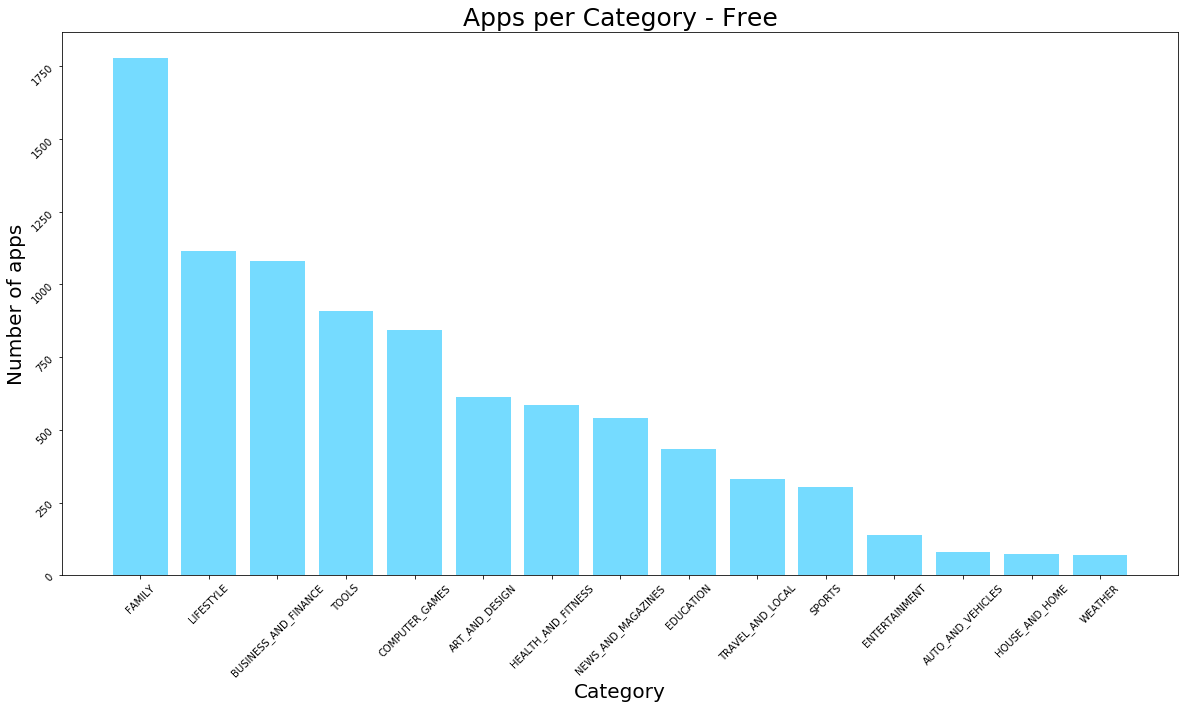

In [10]:
#Bar graph showing Count of Free Apps per Category
plt.figure(figsize=(20,10))
plt.bar(free_count.index.values, free_count['Category'], color='#3BCCFF', alpha=0.7, align="center")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Apps per Category - Free", fontsize=25)
plt.xlabel("Category", fontsize=20)
plt.ylabel("Number of apps", fontsize=20)
plt.savefig("Resources/Free apps per Category")

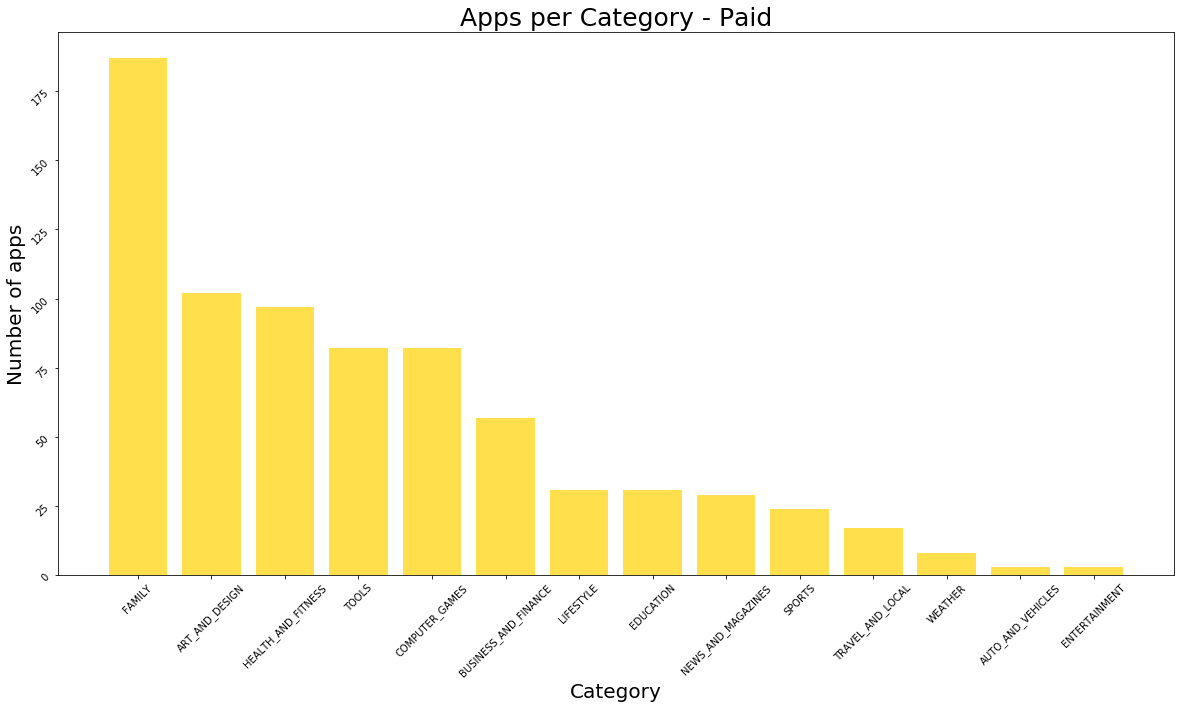

In [11]:
#Bar graph showing Count of Paid Apps per Category
plt.figure(figsize=(20,10))
plt.bar(paid_count.index.values, paid_count['Category'], color='#FFD400', alpha=0.7, align="center")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Apps per Category - Paid", fontsize=25)
plt.xlabel("Category", fontsize=20)
plt.ylabel("Number of apps", fontsize=20)
plt.savefig("Resources/Paid apps per Category")

In [12]:
#Sorting apps by Price
app_store_df.sort_values(by='Price')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.00,EVERYONE,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
7485,CONTRACT KILLER: ZOMBIES,COMPUTER_GAMES,4.4,144545,13M,5000000.0,Free,0.00,AGE_GROUP(13+),Action,1-Dec-11,1.1.0,2.1 and up
7486,CK Shop,TOOLS,0.0,13,8.1M,1000.0,Free,0.00,EVERYONE,Tools,9-May-18,1.1,5.0 and up
7487,FlexBook,FAMILY,4.3,104,12M,10000.0,Free,0.00,EVERYONE,Education;Education,21-May-18,1.0.6,4.1 and up
7488,Can Knockdown 3,COMPUTER_GAMES,4.1,349503,19M,10000000.0,Free,0.00,EVERYONE,Arcade,26-Aug-15,1.31,4.0 and up
7489,Fu*** Weather (Funny Weather),WEATHER,4.7,20001,Varies with device,1000000.0,Free,0.00,ADULT ONLY,Weather,26-Jul-18,Varies with device,Varies with device
7490,OB-GYN USMLE Stp2 CK 300 Q & A,HEALTH_AND_FITNESS,4.4,34,4.9M,10000.0,Free,0.00,EVERYONE,Medical,16-May-15,1.2,2.0 and up
7484,Ck Coif,LIFESTYLE,0.0,0,22M,10.0,Free,0.00,EVERYONE,Lifestyle,30-Apr-16,1,2.3 and up
7491,CK Active,HEALTH_AND_FITNESS,0.0,0,9.7M,10.0,Free,0.00,EVERYONE,Health & Fitness,27-Feb-18,3.0.6,4.0 and up
7493,Night Camera Blur Effect,ART_AND_DESIGN,3.6,100,2.5M,10000.0,Free,0.00,EVERYONE,Photography,5-Aug-18,4.2,4.2 and up


In [13]:
app_store_df.count()

App               9657
Category          9657
Rating            9657
Reviews           9657
Size              9657
Installs          9657
Type              9657
Price             9657
Content Rating    9657
Genres            9657
Last Updated      9657
Current Ver       9649
Android Ver       9657
dtype: int64

In [14]:
#Resetting Rating
app_store_df["Rating"] = app_store_df["Rating"].astype(str)
app_store_df["Rating"] = app_store_df["Rating"].replace({"nan": "0.0"})
rating_reset = app_store_df.groupby(["Rating"])
rating_reset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.00,EVERYONE,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.00,EVERYONE,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.00,AGE_GROUP(13+),Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.00,EVERYONE,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000.0,Free,0.00,EVERYONE,Art & Design,26-Mar-17,1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000.0,Free,0.00,EVERYONE,Art & Design,26-Apr-18,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000.0,Free,0.00,EVERYONE,Art & Design,14-Jun-18,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000.0,Free,0.00,EVERYONE,Art & Design,20-Sep-17,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000.0,Free,0.00,EVERYONE,Art & Design;Creativity,3-Jul-18,2.8,4.0.3 and up
10,Text on Photo - Fonteee,ART_AND_DESIGN,4.4,13880,28M,1000000.0,Free,0.00,EVERYONE,Art & Design,27-Oct-17,1.0.4,4.1 and up


In [15]:
#Organizing based on new categories and writing into a separate file
app_store_df.to_csv("Resources/googleplaystore_apps_organized.csv",index = False)

# 1 Billion Downloads Analysis

In [16]:
#Count of unique Apps with 1 billion downloads
count_apps = app_store_df[app_store_df["Installs"] == 1000000000]["App"]
count_apps.describe()

count                                           20
unique                                          20
top       Messenger – Text and Video Chat for Free
freq                                             1
Name: App, dtype: object

In [17]:
#Verify if the apps downloaded a billion times are Free or Paid
top_type = app_store_df[app_store_df["Installs"] == 1000000000]["Type"]
top_type.describe()

count       20
unique       1
top       Free
freq        20
Name: Type, dtype: object

In [18]:
#Top Rating for apps downloaded a billion times 
top_rating = app_store_df[app_store_df["Installs"] == 1000000000]["Rating"]
top_rating.max()

'4.5'

In [19]:
#Creating a dataframe of count of Apps with 1 billion downloads
count_apps = app_store_df.loc[app_store_df["Installs"] == 1000000000]
count_apps_group = pd.DataFrame(count_apps["App"].value_counts())
count_apps_group.count()

App    20
dtype: int64

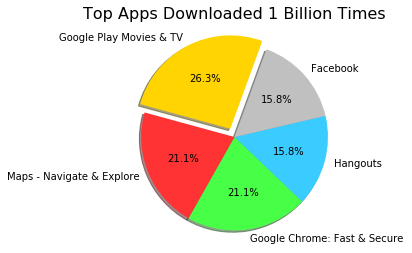

In [20]:
#Pie Chart showing Frequency and top 5 Apps downloaded 1 billion times
labels = ["Google Play Movies & TV", "Maps - Navigate & Explore", "Google Chrome: Fast & Secure", "Hangouts", "Facebook"]
sizes = [5, 4, 4, 3, 3]
explode = [0.1, 0 , 0, 0, 0]
colors = ["#FFD400", "#FF3333", "#48FF48", "#3BCCFF", "#C0C0C0"]

#Build Pie Chart
plt.pie(sizes, startangle = 70, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True)
plt.title("Top Apps Downloaded 1 Billion Times", fontsize=16)

#Tell Matplotlib that we want the chart to have equal axes
plt.axis("equal")
plt.rcParams["figure.figsize"] = (10,5)

#Save figure
plt.savefig("Resources/Top Apps Downloaded 1 Billion Times.png")
plt.show()

# Free vs Paid Apps

In [21]:
#Get a total count of Price for Paid Apps greater than $100
selected_price = app_store_df.sample(n=9500)
selected_price = selected_price[selected_price["Price"].astype(int) > 100]

selected_price.count()

App               20
Category          20
Rating            20
Reviews           20
Size              20
Installs          20
Type              20
Price             20
Content Rating    20
Genres            20
Last Updated      20
Current Ver       20
Android Ver       20
dtype: int64

In [22]:
# Isolate Paid Apps data
paid_apps_df = app_store_df.loc[app_store_df["Type"] == "Paid"]
paid_apps_df.count()

App               753
Category          753
Rating            753
Reviews           753
Size              753
Installs          753
Type              753
Price             753
Content Rating    753
Genres            753
Last Updated      753
Current Ver       751
Android Ver       753
dtype: int64

In [23]:
# Isolate Free Apps data
free_apps_df = app_store_df.loc[app_store_df["Type"] == "Free"]
free_apps_df.count()

App               8904
Category          8904
Rating            8904
Reviews           8904
Size              8904
Installs          8904
Type              8904
Price             8904
Content Rating    8904
Genres            8904
Last Updated      8904
Current Ver       8898
Android Ver       8904
dtype: int64

# Content Rating Analysis

In [24]:
#Group age for the target users using Free Apps
by_type = app_store_df.groupby("Content Rating")["Type"]
                                    
by_type.count()

Content Rating
ADULT ONLY         396
AGE_GROUP(10+)     322
AGE_GROUP(13+)    1036
EVERYONE          7901
UNRATED              2
Name: Type, dtype: int64

In [25]:
paid_apps_df = app_store_df.loc[app_store_df["Type"] == "Paid"]
paid_age_group = pd.DataFrame(paid_apps_df["Content Rating"].value_counts())
paid_age_group

,Content Rating
EVERYONE,652
AGE_GROUP(13+),52
AGE_GROUP(10+),31
ADULT ONLY,18


In [26]:
v = paid_age_group.loc["EVERYONE", "Content Rating"]
w = paid_age_group.loc["AGE_GROUP(13+)", "Content Rating"]
x = paid_age_group.loc["AGE_GROUP(10+)", "Content Rating"]
y = paid_age_group.loc["ADULT ONLY", "Content Rating"]
print(v, w, x, y)

652 52 31 18


In [27]:
free_apps_df = app_store_df.loc[app_store_df["Type"] == "Free"]
free_age_group = pd.DataFrame(free_apps_df["Content Rating"].value_counts())
free_age_group

,Content Rating
EVERYONE,7249
AGE_GROUP(13+),984
ADULT ONLY,378
AGE_GROUP(10+),291
UNRATED,2


In [28]:
v = free_age_group.loc["EVERYONE", "Content Rating"]
w = free_age_group.loc["AGE_GROUP(13+)", "Content Rating"]
x = free_age_group.loc["AGE_GROUP(10+)", "Content Rating"]
y = free_age_group.loc["ADULT ONLY", "Content Rating"]
z = free_age_group.loc["UNRATED", "Content Rating"]
print(v, w, x, y, z)

7249 984 291 378 2


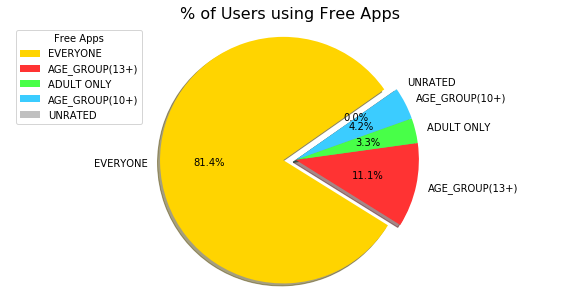

In [29]:
#Pie chart to show % of Target Group (users) using Free Apps
labels = ["EVERYONE", "AGE_GROUP(13+)", "ADULT ONLY", "AGE_GROUP(10+)", "UNRATED"]
sizes = [7249, 984, 291, 378, 2]
explode = [0.1, 0 , 0, 0, 0]
colors = ["#FFD400", "#FF3333", "#48FF48", "#3BCCFF", "#C0C0C0"]

#Build Pie Chart
plt.pie(sizes, startangle = 35, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True)
plt.title("% of Users using Free Apps", fontsize=16)
plt.legend(title = "Free Apps", loc = "upper left")
plt.axis("equal")
plt.rcParams["figure.figsize"] = (10,5)

#Save figure
plt.savefig("Resources/% of Users using Free Apps.png")
plt.show()

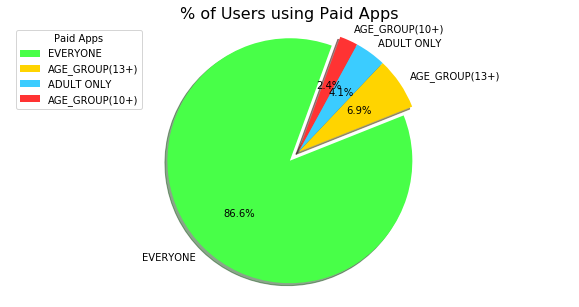

In [30]:
#Pie chart to show % of Target Group (users) using Paid Apps
labels = ["EVERYONE", "AGE_GROUP(13+)", "ADULT ONLY", "AGE_GROUP(10+)"]
sizes = [652, 52, 31, 18]
explode = [0.1, 0 , 0, 0]
colors = ["#48FF48", "#FFD400", "#3BCCFF", "#FF3333"]

#Build Pie Chart
plt.pie(sizes, startangle = 70, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True)
plt.title("% of Users using Paid Apps", fontsize=16)
plt.legend(title = "Paid Apps", loc = "upper left")
plt.axis("equal")
plt.rcParams["figure.figsize"] = (10,5)

#Save figure
plt.savefig("Resources/% of Users using Paid Apps.png")
plt.show()

## App Analysis by Popularity

In [31]:
#Top 5 Popular Free Apps
popular_top5_freeapp = free_apps_df.nlargest(5, ['Reviews'])
popular_top5_freeapp

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3943,Facebook,LIFESTYLE,4.1,78128208,Varies with device,1.000000e+09,Free,0.0,AGE_GROUP(13+),Social,3-Aug-18,Varies with device,Varies with device
3904,WhatsApp Messenger,NEWS_AND_MAGAZINES,4.4,69109672,Varies with device,1.000000e+09,Free,0.0,EVERYONE,Communication,3-Aug-18,Varies with device,Varies with device
3909,Instagram,LIFESTYLE,4.5,66509917,Varies with device,1.000000e+09,Free,0.0,AGE_GROUP(13+),Social,31-Jul-18,Varies with device,Varies with device
4104,Messenger – Text and Video Chat for Free,NEWS_AND_MAGAZINES,4.0,56642847,Varies with device,1.000000e+09,Free,0.0,EVERYONE,Communication,1-Aug-18,Varies with device,Varies with device
3986,Clash of Clans,FAMILY,4.6,44881447,98M,1.000000e+08,Free,0.0,AGE_GROUP(10+),Strategy,15-Jul-18,10.322.16,4.1 and up


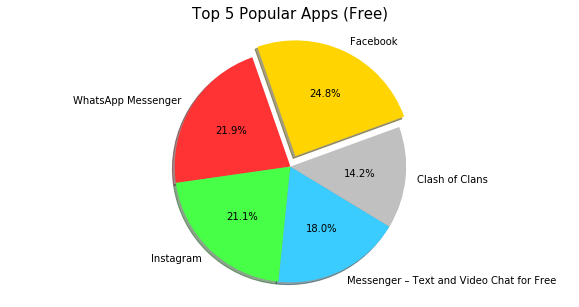

In [32]:
#Pie Chart of Top 5 Popular Free Apps
labels = list(popular_top5_freeapp["App"])
colors = ["#FFD400", "#FF3333", "#48FF48", "#3BCCFF", "#C0C0C0"]
sizes = list(popular_top5_freeapp["Reviews"])
explode = (0.1,0,0,0,0)

plt.pie(sizes, labels=labels, explode=explode,colors=colors, autopct="%1.1f%%", shadow=True, startangle=20)
plt.axis("equal")
plt.title("Top 5 Popular Apps (Free)", fontsize=15)
plt.rcParams["figure.figsize"] = (10,5)
plt.savefig("Resources/Top 5 Popular Free Apps.png")
plt.show()

In [33]:
#Top 5 Popular Paid Apps
popular_top5_paidapp = paid_apps_df.nlargest(5, ['Reviews'])
popular_top5_paidapp

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4347,Minecraft,FAMILY,4.5,2375336,Varies with device,10000000.0,Paid,6.99,AGE_GROUP(10+),Arcade;Action & Adventure,24-Jul-18,1.5.2.1,Varies with device
4034,Hitman Sniper,COMPUTER_GAMES,4.6,408292,29M,10000000.0,Paid,0.99,ADULT ONLY,Action,12-Jul-18,1.7.110758,4.1 and up
7415,Grand Theft Auto: San Andreas,COMPUTER_GAMES,4.4,348962,26M,1000000.0,Paid,6.99,ADULT ONLY,Action,21-Mar-15,1.08,3.0 and up
8858,Bloons TD 5,FAMILY,4.6,190086,94M,1000000.0,Paid,2.99,EVERYONE,Strategy,13-Jul-18,3.16,2.3.3 and up
9676,Where's My Water?,FAMILY,4.7,188740,69M,1000000.0,Paid,1.99,EVERYONE,Puzzle;Brain Games,5-Jul-18,1.16.0,4.2 and up


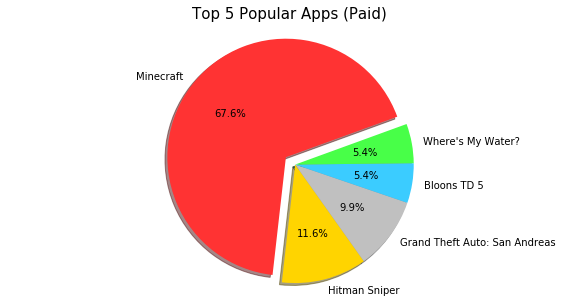

In [34]:
#Pie Chart of Top 5 Popular Paid Apps
labels = list(popular_top5_paidapp["App"])
colors = ["#FF3333", "#FFD400", "#C0C0C0", "#3BCCFF", "#48FF48"]
sizes = list(popular_top5_paidapp["Reviews"])
explode = (0.1,0,0,0,0)

plt.pie(sizes, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=20)
plt.axis("equal")
plt.title("Top 5 Popular Apps (Paid)", fontsize=15)
plt.rcParams["figure.figsize"] = (10,5)
plt.savefig("Resources/Top 5 Popular Paid Apps.png")
plt.show()

## Revenue Calculation(Paid Apps only)

In [35]:
#Calculate the Revenue and add a new column to df
paid_apps_df['Revenue'] = paid_apps_df['Installs'] * paid_apps_df['Price']
appRevenue_df = pd.read_csv("Resources/appRevenueChart.csv")
appRevenue_df.sort_values("Revenue", inplace=True)
appRevenue_df.head()

,Category,Revenue
13,AUTO_AND_VEHICLES,100148
12,EDUCATION,493315
11,ENTERTAINMENT,798110
10,TRAVEL_AND_LOCAL,2392293
9,WEATHER,4181380


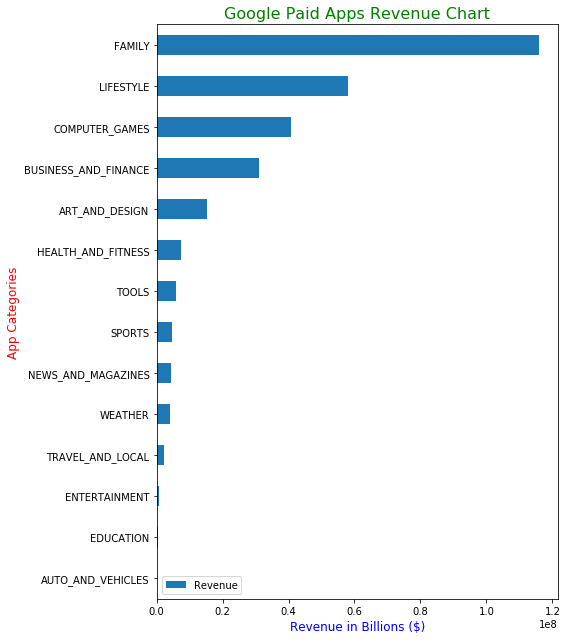

In [36]:
#Use DataFrame.plot() in order to create a bar chart of the data
multi_plot = appRevenue_df.plot(kind="barh", figsize=(8,9))

#PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_yticklabels(appRevenue_df["Category"], rotation=0)

#Set a title for the chart
plt.title("Google Paid Apps Revenue Chart", fontsize=16, color="green")
plt.ylabel("App Categories", fontsize=12, color="red")
plt.xlabel("Revenue in Billions ($)", fontsize=12, color="blue")
plt.tight_layout()
plt.savefig("Resources/PaidApp_Revenues.png")
plt.show()

## Ratings vs Reviews Coorelation

In [37]:
#Binning
max_downloads_paidapp = paid_apps_df.nlargest(200, ['Installs'])
max_downloads_paidapp
bins = [0.0,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5]
group_names = [0,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5]
max_downloads_paidapp["App Rating"] = pd.cut(max_downloads_paidapp["Rating"].astype(float), bins, labels=group_names)

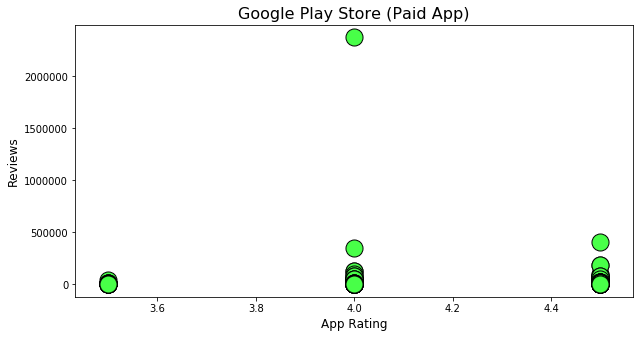

In [38]:
#Creating Scatter Plot
plt.scatter(x = max_downloads_paidapp["App Rating"], y = max_downloads_paidapp["Reviews"],\
           marker="o", c = "#48FF48", s = x*1, edgecolor="black")

plt.title("Google Play Store (Paid App)", fontsize = 16)
plt.xlabel("App Rating", fontsize = 12)
plt.ylabel("Reviews", fontsize = 12)

#plt.xticks(np.arange(max_downloads_paidapp["App Rating"].min(), max_downloads_paidapp["App Rating"].max()+0.5, 0.5))
#plt.rcParams["figure.figsize"] = (10,5)

plt.savefig("Resources/Google Play Store (Paid App)")
plt.show()

In [39]:
#Binning
max_downloads_freeapp = free_apps_df.nlargest(200, ['Installs'])
max_downloads_freeapp
bins = [0.0,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5]
group_names = [0,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5]
max_downloads_freeapp["App Rating"] = pd.cut(max_downloads_freeapp["Rating"].astype(float), bins, labels=group_names)

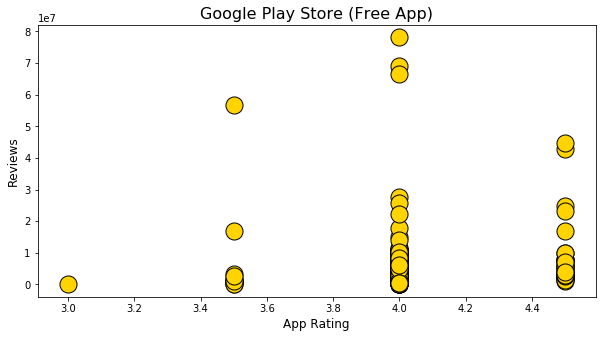

In [40]:
#Creating Scatter Plot
plt.scatter(x = max_downloads_freeapp["App Rating"], y = max_downloads_freeapp["Reviews"],\
           marker="o", c = "#FFD400", s = x*1, edgecolor="black")


plt.title("Google Play Store (Free App)", fontsize = 16)
plt.xlabel("App Rating", fontsize = 12)
plt.ylabel("Reviews", fontsize = 12)

#plt.xticks(np.arange(max_downloads_freeapp["App Rating"].min(), max_downloads_freeapp["App Rating"].max()+0.5, 0.5))
#plt.rcParams["figure.figsize"] = (10,5)

plt.savefig("Resources/Google Play Store (Free App)")
plt.show()

## Observations and Conclusions

#### - Over 92% of the total apps were Free to download on the Google Play Store, of which Categories "Family" and “Lifestyle” were the most popular and profitable.
#### - While Facebook(24.8%), Whatsapp (21.9%) and Instagram(21.1%) are closely competing as top free apps, Minecraft(67.6%) emerges as single largest paid app.
#### - It can be noticed that significant number of people prefer to purchase the apps which are related to Art and Design and Health and Fitness. 
#### - Top downloaded free apps are mainly of Social media and Communication genre.
#### - Top downloaded paid apps mainly belong to Action/Adventure, Strategy and Puzzles genre.
#### - It can be noted that most developers find success when they prefer to limit the complexity of their app to make it available for everyone and publish them mostly under the categories of “Family” and “Lifestyle”.
#### - Ratings are better indicator of app quality than review count. App developers could use ratings as their key performance indicator (KPI) to measure quality and success.
#### - After this analysis, we can arrive at a conclusion that our hypothesis is partially true. App developers mostly find success in the areas pertaining to “Family” and “Lifestyle”. Evidence show that, to a larger extend even gaming applications are also successful. But it is clear to us that “Educational” Apps are still considerably less popular as of now.


#### -------------------- ooooooo ------------------------------